In [1]:
import root_pandas
from root_pandas import read_root
import ROOT
import matplotlib.pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.24/00


In [2]:
#load files

signalfile = "recsigmasignalfinal.root"
ccbar = "savir_CCbarBkg1.root"
uubar = "savir_UUbarBkg1.root"
ddbar = "savir_DDbarBkg1.root"
ssbar = "savir_SSbarBkg1.root"
mixed = "savir_MixedBkg1.root"
charged = "savir_chargedBkg1.root"

#columns we need
mycols = ['xic_isSignal','xic_M','sigma_M','gamma1_clusterE9E21','gamma2_clusterE9E21','sigma_significanceOfDistance','sigma_p','xic_E','sigma_mcDecayVertexFromIPDistance','xic_flightDistance','xic_chiProb','xic_significanceOfDistance','xic_mcFlightTime','xic_flightTimeErr']

df = read_root(signalfile, key="xic_tree",columns=mycols)
df_ccbar = read_root(ccbar, key="xic_tree", columns=mycols)
df_uubar = read_root(uubar, key="xic_tree", columns=mycols)
df_ddbar = read_root(ddbar, key="xic_tree", columns=mycols)
df_ssbar = read_root(ssbar, key="xic_tree", columns=mycols)
df_mixed = read_root(mixed, key="xic_tree", columns=mycols)
df_charged = read_root(charged, key="xic_tree", columns=mycols)


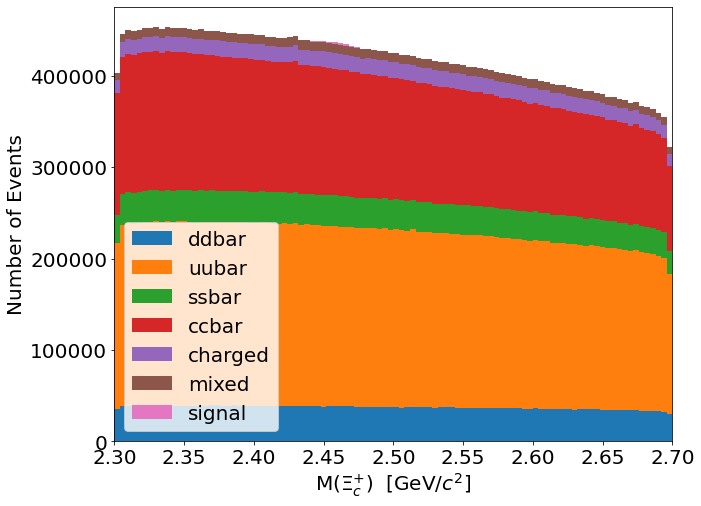

signal events: 13349
total bkg events: 41777116
signal:background ratio = 0.00031952899764550524

Applying BELLE2 style settings...


In [3]:
#invariant mass Xi_c+ before cuts

import ROOT as r
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7'
nbins=100
myrange=(2.3,2.7)

ax = plt.subplot()

# define a numpy array from the "M" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').xic_M.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)

# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'M($\Xi_{c}^{+}$)  [GeV/$c^{2}$]')
plt.legend()
plt.show()


#print number of events
signalevents = len(nptrue)
bkgevents = len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed)
print('signal events: '+str(signalevents))
print('total bkg events: '+str(bkgevents))
print('signal:background ratio = '+str(signalevents/bkgevents))

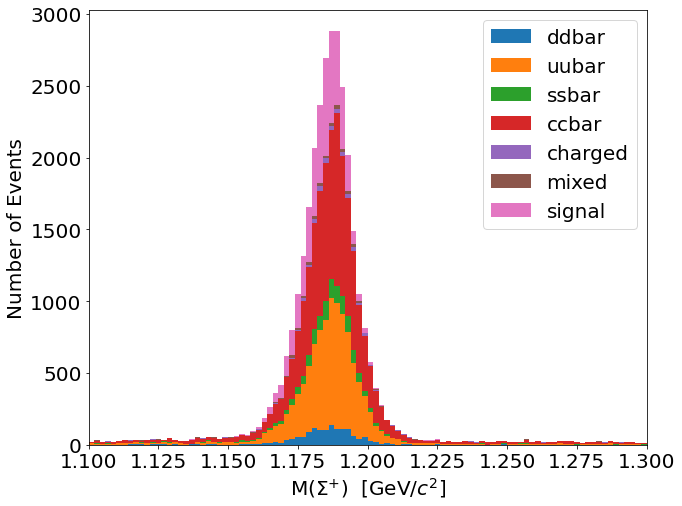


Applying BELLE2 style settings...


In [4]:
#invariant mass Sigma+

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(1.1,1.3)

ax = plt.subplot()

# define a numpy array from the "M" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').sigma_M.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').sigma_M.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').sigma_M.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').sigma_M.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').sigma_M.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').sigma_M.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').sigma_M.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)


# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'M($\Sigma^{+}$)  [GeV/$c^{2}$]')
plt.legend()

plt.show()


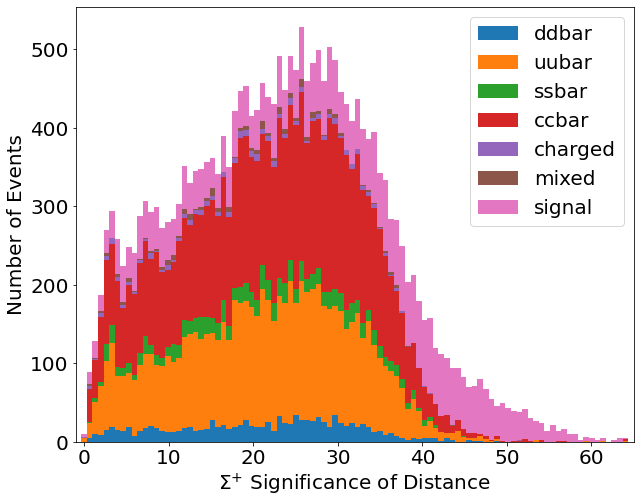


Applying BELLE2 style settings...


In [5]:
#Sigma+ significance of distance

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(-1,65)

ax = plt.subplot()

# define a numpy array from the "significance of distance" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').sigma_significanceOfDistance.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').sigma_significanceOfDistance.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').sigma_significanceOfDistance.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').sigma_significanceOfDistance.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').sigma_significanceOfDistance.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').sigma_significanceOfDistance.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').sigma_significanceOfDistance.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)

# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)

plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\Sigma^{+}$ Significance of Distance')
plt.legend()

plt.show()


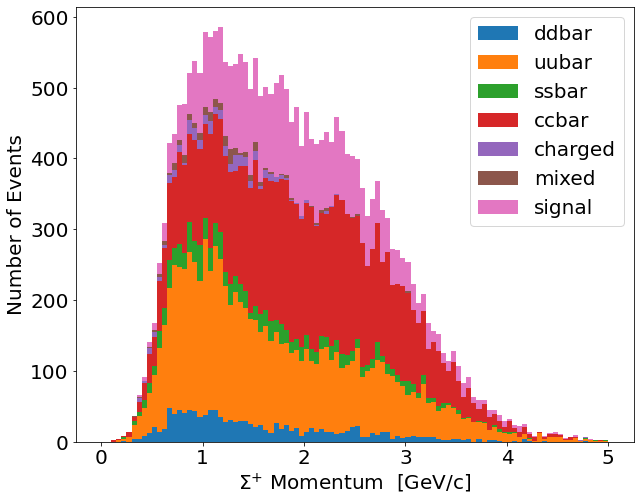


Applying BELLE2 style settings...


In [6]:
#Sigma+ momentum

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(0,5)

ax = plt.subplot()

# define a numpy array from the "p" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').sigma_p.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').sigma_p.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').sigma_p.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').sigma_p.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').sigma_p.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').sigma_p.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').sigma_p.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)


# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.ylabel('Number of Events')
plt.xlabel(r'$\Sigma^{+}$ Momentum  [GeV/c]')
plt.legend()


plt.show()


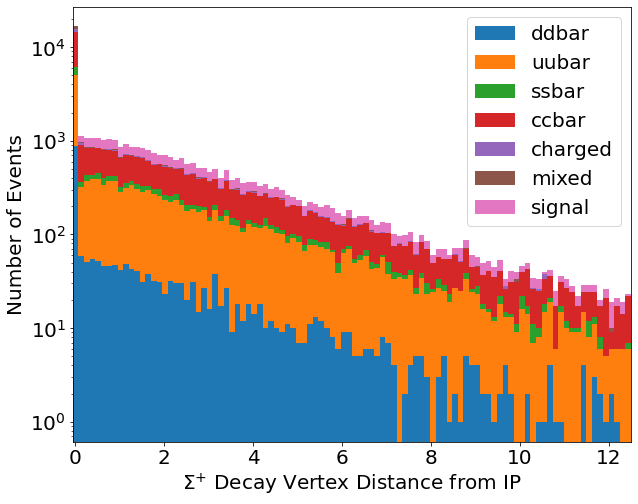


Applying BELLE2 style settings...


In [7]:
#Sigma+ mcDecayVertexFromIPDistance

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(-0.05,12.5)

ax = plt.subplot()

# define a numpy array from the "mcDecayVertexFromIPDistance" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').sigma_mcDecayVertexFromIPDistance.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)


# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.yscale("log")
plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\Sigma^{+}$ Decay Vertex Distance from IP')
plt.legend()


plt.show()


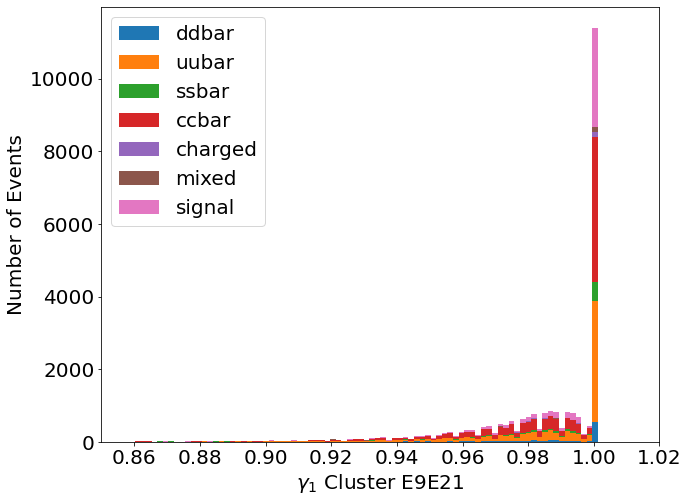


Applying BELLE2 style settings...


In [8]:
#gamma1 clusterE9E21

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(0.85,1.02)

ax = plt.subplot()

# define a numpy array from the "clusterE9E21" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').gamma1_clusterE9E21.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').gamma1_clusterE9E21.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').gamma1_clusterE9E21.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').gamma1_clusterE9E21.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').gamma1_clusterE9E21.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').gamma1_clusterE9E21.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').gamma1_clusterE9E21.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)



# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\gamma_{1}$ Cluster E9E21')
plt.legend()


plt.show()


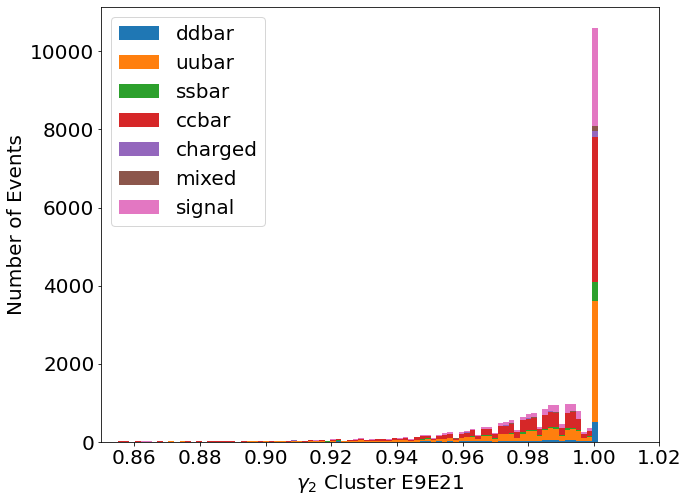


Applying BELLE2 style settings...


In [9]:
#gamma2 clusterE9E21

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(0.85,1.02)

ax = plt.subplot()

# define a numpy array from the "clusterE9E21" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').gamma2_clusterE9E21.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').gamma2_clusterE9E21.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').gamma2_clusterE9E21.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').gamma2_clusterE9E21.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').gamma2_clusterE9E21.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').gamma2_clusterE9E21.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').gamma2_clusterE9E21.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)



# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\gamma_{2}$ Cluster E9E21')
plt.legend()


plt.show()


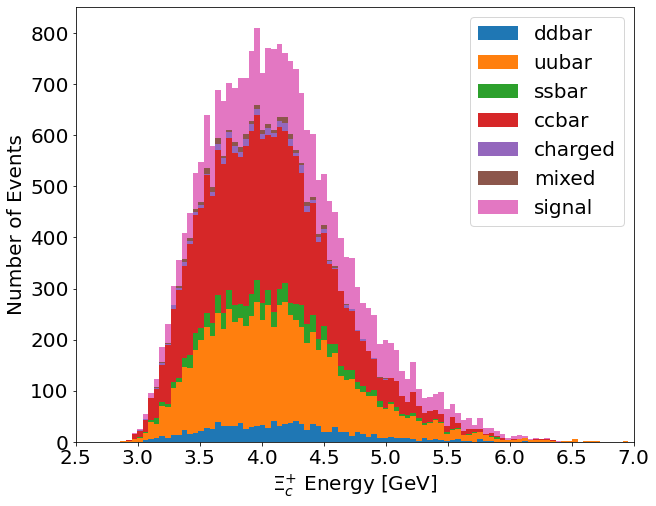


Applying BELLE2 style settings...


In [10]:
#Xi_c+ energy

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(2.5,7)

ax = plt.subplot()

# define a numpy array from the "E" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').xic_E.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').xic_E.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').xic_E.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').xic_E.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').xic_E.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').xic_E.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').xic_E.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)


# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\Xi_{c}^{+}$ Energy [GeV]')
plt.legend()

plt.show()


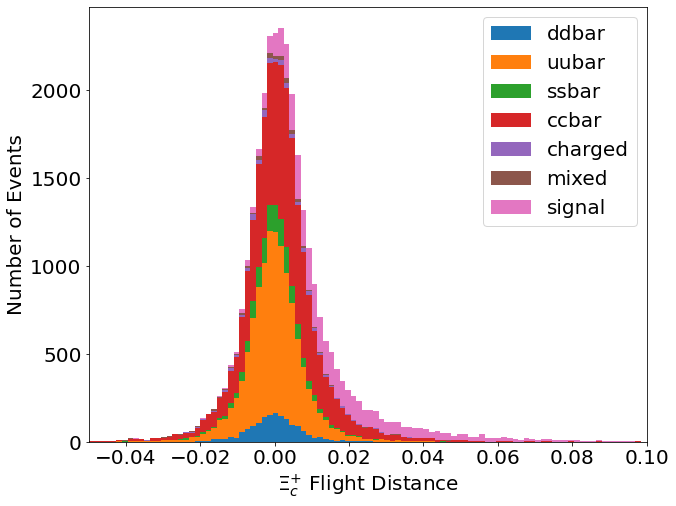


Applying BELLE2 style settings...


In [11]:
#Xi_c+ flight distance

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(-0.05,0.1)

ax = plt.subplot()

# define a numpy array from the "flightDistance" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').xic_flightDistance.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').xic_flightDistance.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').xic_flightDistance.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').xic_flightDistance.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').xic_flightDistance.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').xic_flightDistance.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').xic_flightDistance.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)


# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)

plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\Xi_{c}^{+}$ Flight Distance')
plt.legend()

plt.show()


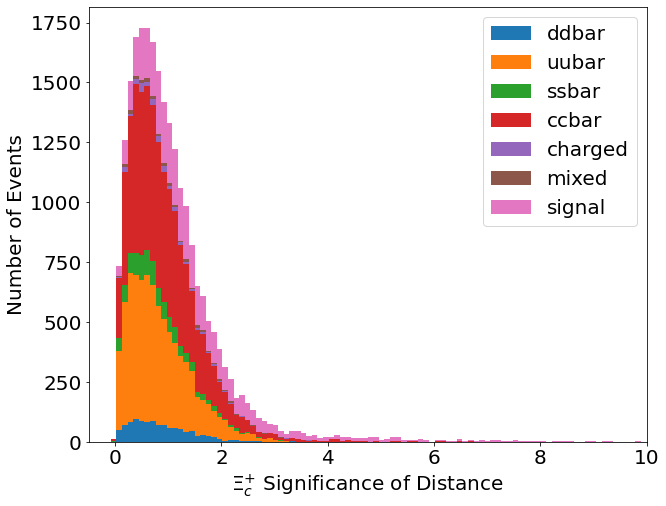


Applying BELLE2 style settings...


In [12]:
#Xi_c+ significance of distance

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01'
nbins=100
myrange=(-0.5,10)

ax = plt.subplot()

# define a numpy array from the "significance of distance" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').xic_significanceOfDistance.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').xic_significanceOfDistance.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').xic_significanceOfDistance.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').xic_significanceOfDistance.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').xic_significanceOfDistance.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').xic_significanceOfDistance.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').xic_significanceOfDistance.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)



# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)



plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'$\Xi_{c}^{+}$ Significance of Distance')
plt.legend()

plt.show()


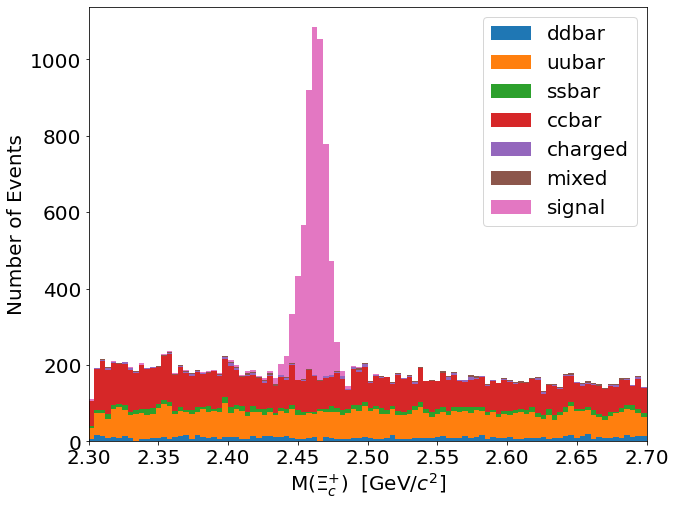

signal events: 4526
total bkg events: 17307
signal:background ratio = 0.2615126827295314

Applying BELLE2 style settings...


In [13]:
#invariant mass Xi_c+ after cuts

import numpy as np
import ROOT as r
import scipy
import scipy.stats
r.gROOT.LoadMacro('/belle2work/psgebeli/belle2style/root/Belle2Style.C') 
r.SetBelle2Style()

# Make nice looking plots
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (10, 8),
})


signal = '(xic_isSignal==1)'
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_M > 1.173 & sigma_M < 1.194 & gamma1_clusterE9E21 > 0.968 & gamma2_clusterE9E21 > 0.968 & sigma_significanceOfDistance > 4 & sigma_p > 0.75 & sigma_p < 3.36 & xic_E > 3.42 & sigma_mcDecayVertexFromIPDistance > 0.1 & sigma_mcDecayVertexFromIPDistance < 4 & xic_flightDistance > -0.002 & xic_chiProb > 0.01 & xic_significanceOfDistance > 0.23'
nbins=100
myrange=(2.3,2.7)

ax = plt.subplot()

# define a numpy array from the "M" column in the dataframe
#run over new MC
nptrue = df.query(cuts+'and xic_isSignal==1').xic_M.to_numpy()
np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_uu= df_uubar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_charged = df_charged.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()
np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1').xic_M.to_numpy()

scale = 1 # scale factor by eye
wnp_dd = [scale] * len(np_dd)
wnp_uu = [scale] * len(np_uu)
wnp_ss = [scale] * len(np_ss)
wnp_cc = [scale] * len(np_cc)
wnp_charged = [scale]*len(np_charged)
wnp_mixed = [scale]*len(np_mixed)
wnptrue = [scale] * len(nptrue)

# use the numpy data to create a matplotlib histogram
ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
        label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


plt.xlim(myrange)
plt.ylabel('Number of Events')
plt.xlabel(r'M($\Xi_{c}^{+}$)  [GeV/$c^{2}$]')
plt.legend()


plt.show()


#print number of events
signalevents = len(nptrue)
bkgevents = len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed)
print('signal events: '+str(signalevents))
print('total bkg events: '+str(bkgevents))
print('signal:background ratio = '+str(signalevents/bkgevents))

signal to background: 0.7952908100509577
Fit success: True, xic mass: 2.462095026908438, width: 0.008123485555288357


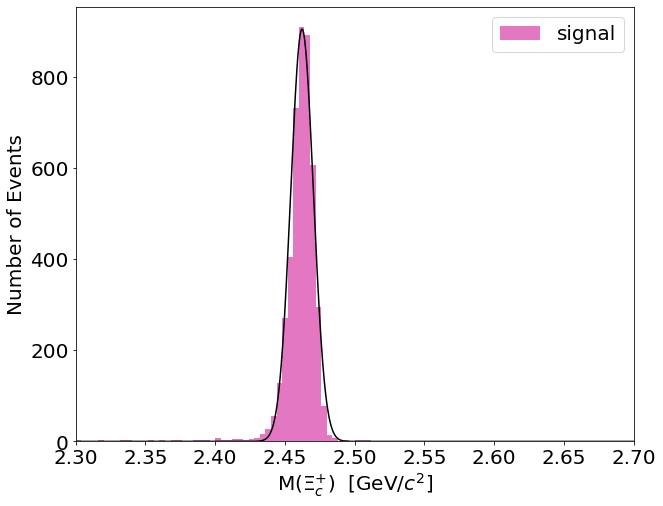

In [14]:
#Fit to single Gaussian distribution

Dst = df.query(cuts)
nptrue = df.query(cuts+'and xic_isSignal==1').xic_M.to_numpy()

import scipy
import scipy.stats
import numpy as np
from math import e

signal_to_background_fraction = Dst.xic_isSignal.mean()
print(f"signal to background: {signal_to_background_fraction}")

def pdf(xic_mass, xic_width, M):
    signal_pdf = scipy.stats.norm.pdf(M, loc=xic_mass, scale=xic_width)
    bckgrd_pdf = 1
    return signal_to_background_fraction * signal_pdf + (1-signal_to_background_fraction) * bckgrd_pdf

def logLikelihood(parameters, M):
    xic_mass, xic_width = parameters
    return -np.log(pdf(xic_mass, xic_width, M)).sum()

result = scipy.optimize.minimize(logLikelihood, [Dst.xic_M.mean(), Dst.xic_M.std()], args=(Dst.xic_M), method='Nelder-Mead')
print(f"Fit success: {result.success}, xic mass: {result.x[0]}, width: {result.x[1]}")
ax = plt.subplot()


x = np.linspace(2.3, 2.7, 1000)
y = pdf(result['x'][0], result['x'][1], x) * len(Dst) * 0.4/100

ax.hist(nptrue, bins=100, range=(2.3,2.7),
        label="signal",color='#e377c2')

#variables
y.sort()
a = y[-1]
b = 2.462095026908438
c=0.008123485555288357

#define gaussian function, add y values
count=0
ygauss = []
for i in range(1000):
    x = 2.3+count*0.0004
    myfunction1 = a*(e**((-1*((x-b)**2))/(2*(c**2))))
    ygauss.append(myfunction1)
    count+=1
x= np.linspace(2.3, 2.7, 1000)
plt.plot(x,ygauss,color='black')


plt.ylabel('Number of Events')
plt.xlabel(r'M($\Xi_{c}^{+}$)  [GeV/$c^{2}$]')
plt.legend()
plt.xlim(myrange)
plt.show()